# **The Project Scenario**
## Overview
In this project, as an entry-level data analyst at a fictional Mint Classics Company, you are helping to analyze data in a relational database with the goal of supporting inventory-related business decisions that lead to the closure of a storage facility.

<img src="BJN1GuemQUKq1-lYggwKTw_deeac783a8f240e7a57ce06449a230f1_computer-g067bab2cf_640.png">


#### **Project Scenario** 
<p>Mint Classics Company, a retailer of classic model cars and other vehicles, is looking at closing one of their storage facilities.<br> <!-- note the use of a line break to ensure the text moves to the next line -->
To support a data-based business decision, they are looking for suggestions and recommendations for reorganizing or reducing inventory, <br> while still maintaining timely service to their customers. For example, they would like to be able to ship a product to a customer within 24 hours <br> of the order being placed.</P>

## **Project Design**
From the mint classic database, we perform some necessary steps to ensure the integrity and accuracy of our data. These include;

- **Creating Tables and Importing of data** <br>
For this project we already have the Sql file ‘mintclassicsDB.sql’ script which we used to create the tables and insert the corresponding table values.

- **Joining of Tables** <br>
That is, we get the entity relationship diagram to know the primary and secondary keys from which we can use to join the necessary tables for our analyses. The ER diagram is displayed below;




 <img src='mintclassicsDB_ER_Diagram.png'>
<br>
So from the ER diagram we then can now perform joining operations of the various tables to get a wholesome and unified view of the dataset. 


But first we need to create a sql to python connection that would allow us to interract seamlessly between both languages

In [5]:
# this code is essential to connect mysql database to python
%pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: mysql-connector-python in c:\users\princess\anaconda3\lib\site-packages (8.2.0)



And because we want to display our results in dataframes, we install and import pandas

In [1]:
# though we first need to import pandas
%pip install pandas

%pip install sqlalchemy # ORM for databases

%pip install ipython-sql # SQL magic function

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


 **NB** **:** remember to create the mysql connection with python

In [2]:
import mysql.connector
import pandas as pd  # Also remember to import pandas library so that we can use the dataframes for display

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="@Manuel97",
  database="mintclassics"
)

In [32]:
sql= "select customerNumber, customerName, productCode, productName, productLine, quantityOrdered, quantityInStock, buyPrice, MSRP, warehouseCode, warehouseName, orderNumber, orderDate, requiredDate, shippedDate, status, comments, creditLimit, customerNumber, contactLastName, contactFirstName, addressLine1, city, state, postalCode, country from customers JOIN orders using(customerNumber) join orderdetails using(orderNumber) join products using(productCode) join warehouses using(warehouseCode) order by orderDate "

df= pd.read_sql_query(sql, mydb) 
df




C:\Users\Princess\AppData\Local\Temp\ipykernel_14340\3004283848.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df= pd.read_sql_query(sql, mydb)


,customerNumber,customerName,productCode,productName,productLine,quantityOrdered,quantityInStock,buyPrice,MSRP,warehouseCode,...,comments,creditLimit,customerNumber,contactLastName,contactFirstName,addressLine1,city,state,postalCode,country
0,363,Online Diecast Creations Co.,S18_1749,1917 Grand Touring Sedan,Vintage Cars,30,2724,86.70,170.00,c,...,None,114200.0,363,Young,Dorothy,2304 Long Airport Avenue,Nashua,NH,62005,USA
1,363,Online Diecast Creations Co.,S18_2248,1911 Ford Town Car,Vintage Cars,50,540,33.30,60.54,c,...,None,114200.0,363,Young,Dorothy,2304 Long Airport Avenue,Nashua,NH,62005,USA
2,363,Online Diecast Creations Co.,S18_4409,1932 Alfa Romeo 8C2300 Spider Sport,Vintage Cars,22,6553,43.26,92.03,c,...,None,114200.0,363,Young,Dorothy,2304 Long Airport Avenue,Nashua,NH,62005,USA
3,363,Online Diecast Creations Co.,S24_3969,1936 Mercedes Benz 500k Roadster,Vintage Cars,49,2081,21.75,41.03,c,...,None,114200.0,363,Young,Dorothy,2304 Long Airport Avenue,Nashua,NH,62005,USA
4,128,"Blauer See Auto, Co.",S18_2325,1932 Model A Ford J-Coupe,Vintage Cars,25,9354,58.48,127.13,c,...,Check on availability.,59700.0,128,Keitel,Roland,Lyonerstr. 34,Frankfurt,None,60528,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,119,La Rochelle Gifts,S24_2300,1962 Volkswagen Microbus,Trucks and Buses,49,2327,61.34,127.79,d,...,None,118200.0,119,Labrune,Janine,"67, rue des Cinquante Otages",Nantes,None,44000,France
2992,119,La Rochelle Gifts,S24_2840,1958 Chevy Corvette Limited Edition,Classic Cars,31,2542,15.91,35.36,b,...,None,118200.0,119,Labrune,Janine,"67, rue des Cinquante Otages",Nantes,None,44000,France
2993,119,La Rochelle Gifts,S32_1268,1980’s GM Manhattan Express,Trucks and Buses,41,5099,53.93,96.31,d,...,None,118200.0,119,Labrune,Janine,"67, rue des Cinquante Otages",Nantes,None,44000,France
2994,119,La Rochelle Gifts,S32_2509,1954 Greyhound Scenicruiser,Trucks and Buses,11,2874,25.98,54.11,d,...,None,118200.0,119,Labrune,Janine,"67, rue des Cinquante Otages",Nantes,None,44000,France


This command joins together the five tables of customers, orders, orderdetails, products and warehouses, while also taking the sum or total amount of the stocked products. 

###### **note :** **Because the results of the sql queries only show in the terminal we use pandas to read and display the exported csv file of this sql query in order to show the results in dataframes.**

Now after we have seen what the unified dataset looks like, we are faced with the issue of duplicate data which could have been repeated across the rows, especially in the aspect of the quantity of stocked products. Thus we need to know the number of individual products available on offering, the amount stored in each warehouse as stock/inventory, the quantity ordered per warehouse as well as the total quantity ordered. Thus all these queries would give us a better understanding of the state of play across the companies business, its products offering, order history and inventory management.

- **Data Cleaning** <br>
Here because our data is an sql file containing various tables as already explained, we need to perform queries that remove duplicate data and ensure we have the right information to give us accurate results. Thus we carry out the following queries;


In [30]:
queryOne= " WITH All_Products as (SELECT productName, sum(quantityInStock) AS TotalStock FROM products GROUP BY productName),others as (select customerNumber, customerName, productCode, productName, productLine, quantityOrdered, quantityInStock, warehouseCode, warehouseName, orderNumber, orderDate, requiredDate, shippedDate, status, comments, contactLastName, contactFirstName, addressLine1, city, state, postalCode, country from customers JOIN orders using(customerNumber) join orderdetails using(orderNumber) join products using(productCode) join warehouses using(warehouseCode))"
queryTwo="SELECT * FROM All_Products left join others using(ProductName)"

df= pd.read_sql_query(queryOne + queryTwo, mydb) 
df

C:\Users\Princess\AppData\Local\Temp\ipykernel_14340\1929550896.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df= pd.read_sql_query(queryOne + queryTwo, mydb)


,productName,TotalStock,customerNumber,customerName,productCode,productLine,quantityOrdered,quantityInStock,warehouseCode,warehouseName,...,shippedDate,status,comments,contactLastName,contactFirstName,addressLine1,city,state,postalCode,country
0,1969 Harley Davidson Ultimate Chopper,7933.0,131.0,Land of Toys Inc.,S10_1678,Motorcycles,30.0,7933.0,a,North,...,2003-02-26,Shipped,Difficult to negotiate with customer. We need ...,Lee,Kwai,897 Long Airport Avenue,NYC,NY,10022,USA
1,1969 Harley Davidson Ultimate Chopper,7933.0,353.0,Reims Collectables,S10_1678,Motorcycles,34.0,7933.0,a,North,...,2003-05-13,Shipped,None,Henriot,Paul,59 rue de l'Abbaye,Reims,None,51100,France
2,1969 Harley Davidson Ultimate Chopper,7933.0,250.0,Lyon Souveniers,S10_1678,Motorcycles,41.0,7933.0,a,North,...,2003-07-05,Shipped,None,Da Silva,Daniel,27 rue du Colonel Pierre Avia,Paris,None,75508,France
3,1969 Harley Davidson Ultimate Chopper,7933.0,205.0,Toys4GrownUps.com,S10_1678,Motorcycles,45.0,7933.0,a,North,...,2003-08-31,Shipped,None,Young,Julie,78934 Hillside Dr.,Pasadena,CA,90003,USA
4,1969 Harley Davidson Ultimate Chopper,7933.0,321.0,Corporate Gift Ideas Co.,S10_1678,Motorcycles,49.0,7933.0,a,North,...,2003-10-16,Shipped,None,Brown,Julie,7734 Strong St.,San Francisco,CA,94217,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,Pont Yacht,414.0,496.0,Kelly's Gift Shop,S72_3212,Ships,31.0,414.0,d,South,...,2004-12-18,Shipped,None,Snowden,Tony,Arenales 1938 3'A',Auckland,None,None,New Zealand
2993,Pont Yacht,414.0,311.0,"Oulu Toy Supplies, Inc.",S72_3212,Ships,29.0,414.0,d,South,...,2005-02-06,Shipped,None,Koskitalo,Pirkko,Torikatu 38,Oulu,None,90110,Finland
2994,Pont Yacht,414.0,141.0,Euro+ Shopping Channel,S72_3212,Ships,43.0,414.0,d,South,...,2005-03-06,Resolved,Disputed then Resolved on 3/15/2005. Customer ...,Freyre,Diego,"C/ Moralzarzal, 86",Madrid,None,28034,Spain
2995,Pont Yacht,414.0,242.0,Alpha Cognac,S72_3212,Ships,34.0,414.0,d,South,...,2005-04-01,Shipped,None,Roulet,Annette,1 rue Alsace-Lorraine,Toulouse,None,31000,France


This queries show a detailed breakdown of the total quantity in stock based on each product line as well as the amount stored in each warehouse. Now we can see that the total amount of stock/inventory is not the 15130027(which contained duplicate values) but 547398 and we can see how it is further distributed among the four warehouses. Also we can see the sum of the all the orders received which is 105516 products ordered, though before the current inventory levels.


In [29]:
sql= "WITH All_Products as (SELECT productName, sum(quantityInStock) AS TotalStock FROM products GROUP BY productName), others as (select customerNumber, customerName, productCode, productName, productLine, quantityOrdered, quantityInStock, warehouseCode, warehouseName, orderNumber, orderDate, requiredDate, shippedDate, status, comments, contactLastName, contactFirstName, addressLine1, city, state, postalCode, country from customers JOIN orders using(customerNumber) join orderdetails using(orderNumber) join products using(productCode) join warehouses using(warehouseCode) ) SELECT sum(distinct quantityInstock) as 2005_total_Inventory FROM All_Products left join others using(ProductName)"

df= pd.read_sql_query(sql, mydb) 
df

C:\Users\Princess\AppData\Local\Temp\ipykernel_14340\949537166.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df= pd.read_sql_query(sql, mydb)


,2005_total_Inventory
0,547398.0


Thus the above queries ensures that we get the distinct total quantityInStock for each product which has a current total of 547398 by distinct products instead of a general sum that adds up all stocks irrespective of their distinct value as seen in the previous query that gave us a total stock of 15130027 of all products

# **Findings and Analysis**
## Findings
Now after we have performed the data clean up using the necessary SQL commands, we can now start looking at the data for correlations and findings that would aid us in our analysis.
First from the above queries we know the following information;
Total quantity of stock or inventory across the four warehouses = 547398
Sum of all products ordered = 105516

We can also find the classification of inventory stored in the various warehouses and from our query below we see that;

The North warehouse stores ‘planes and cars’
The East warehouse stores ‘Classic cars’
The West warehouse stores ‘Vintage Cars’
And the South warehouse stores ‘Trains, ships, Trucks and Buses’ 


In [28]:
queryOne="with productAndWarehouseCode AS (select productline, count(productLine) AS productLinecount from products group by productline),"
queryTwo = "WC_Q_in_stock as (select productline, warehouseCode, quantityInstock from products)"
queryThree = "Select DISTINCT productLine, productLinecount, warehouseCode, sum(quantityInstock) over( partition by warehouseCode) as SumOfStocks from productAndWarehouseCode left join  WC_Q_in_stock using(productline)"

df= pd.read_sql_query(queryOne + queryTwo + queryThree, mydb) 
df

C:\Users\Princess\AppData\Local\Temp\ipykernel_14340\3373957286.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df= pd.read_sql_query(queryOne + queryTwo + queryThree, mydb)


,productLine,productLinecount,warehouseCode,SumOfStocks
0,Motorcycles,13,a,131688.0
1,Planes,12,a,131688.0
2,Classic Cars,38,b,219183.0
3,Vintage Cars,24,c,124880.0
4,Ships,9,d,79380.0
5,Trains,3,d,79380.0
6,Trucks and Buses,11,d,79380.0


In [27]:
sql = 'select DISTINCT warehouseName, warehouseCode, productLine from products join warehouses using(warehouseCode)'

df = pd.read_sql_query(sql, mydb)
df

C:\Users\Princess\AppData\Local\Temp\ipykernel_14340\1054440954.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, mydb)


,warehouseName,warehouseCode,productLine
0,North,a,Motorcycles
1,North,a,Planes
2,East,b,Classic Cars
3,West,c,Vintage Cars
4,South,d,Trucks and Buses
5,South,d,Ships
6,South,d,Trains


Now we can use more queries to get more information on the customers, the orders and the quantity of inventory across the warehouses. 
Considering the status of the orders we see that they are categorised into; ‘shipped’, ‘resolved’, ‘on hold’, ‘in process’, ‘disputed’ and ‘Cancelled’. Now for better analysis of our inventory turnover ratio we would need to only work with shipped and resolved orders, we may also consider the ‘in process’ orders too. Thus we use our query to filter for these specific orders


In [26]:

queryOne = 'WITH All_Products as (SELECT productName, sum(quantityInStock) AS TotalStock FROM products GROUP BY productName),'
queryTwo = "others as (select customerNumber, customerName, productCode, productName, productLine, quantityOrdered, quantityInStock, warehouseCode, warehouseName, orderNumber, orderDate, requiredDate, shippedDate, status, comments, contactLastName, contactFirstName, addressLine1, city, state, postalCode, country from customers JOIN orders using(customerNumber) join orderdetails using(orderNumber) join products using(productCode) join warehouses using(warehouseCode) where status IN ('shipped', 'Resolved') )"
queryThree = "SELECT distinct warehouseName, productName, sum(distinct QuantityInStock) as SumOfStock, sum(quantityOrdered) as TotalQuantityOrdered FROM All_Products left join others using(productName) Group by warehouseName, productName with rollup ORDER BY warehouseName"

df = pd.read_sql_query(queryOne + queryTwo + queryThree, mydb)

df

C:\Users\Princess\AppData\Local\Temp\ipykernel_14340\361930156.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(queryOne + queryTwo + queryThree, mydb)


,warehouseName,productName,SumOfStock,TotalQuantityOrdered
0,None,None,NaN,NaN
1,None,None,547398.0,98801.0
2,None,1985 Toyota Supra,NaN,NaN
3,East,None,211450.0,33643.0
4,East,1948 Porsche 356-A Roadster,8826.0,949.0
...,...,...,...,...
111,West,1938 Cadillac V-16 Presidential Limousine,2847.0,915.0
112,West,1939 Cadillac Limousine,6645.0,969.0
113,West,1939 Chevrolet Deluxe Coupe,7332.0,892.0
114,West,1940 Ford Delivery Sedan,6621.0,771.0


Now we can see the number of orders that fall within the desired category of ‘shipped’ and ‘resolved’. The orders in these category = 98801
<br> Note we didn't include the 'In Process' orders because they are yet to be shipped thus they still make up part of the current inventory though they are due to be shipped.


We wanted to get the number of these specific orders because orders that were ‘cancelled’, ‘disputed’ or ‘on- hold’ will most likely be returned back to the warehouses if they have already been shipped thus we are making our analysis on only finished or completed orders.  

Also from our queries we can see the distribution of the inventory across the four warehouses. Here is the inventory distribution;


In [25]:

sql = "select warehouseCode, sum(quantityInStock) from products group by warehouseCode"

df = pd.read_sql_query(sql, mydb)
df

C:\Users\Princess\AppData\Local\Temp\ipykernel_14340\2663792156.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, mydb)


,warehouseCode,sum(quantityInStock)
0,a,131688.0
1,b,219183.0
2,c,124880.0
3,d,79380.0


<table>
  <tr>
    <th></th>
     <th>QuantityInStock (Inventory)</th>
     <th>QuantityOrdered (for Shipped, resolved)</th>
  </tr>
  <tr>
     <td>All warehouses</td>
     <td>547398</td>
     <td>98801</td>
  </tr>
  <tr>
     <td>East</td>
     <td>211450</td>
     <td>33643</td>
  </tr>
  <tr>
    <td>North</td>
    <td>131688</td>
    <td>23204</td>
   </tr>
   <tr> 
    <td>South</td>
    <td>79380</td>
    <td>21332</td>
   </tr>
   <tr>
     <td>West</td>
     <td>124880</td>
     <td>20622</td>
   </tr>
</table>



### Analysis
Remember the objective of our analysis is to find out if the mintclassics company is storing too much inventory and also to know where we can eliminate excess inventory which could also lead to the closure of a warehouse. Hence to calculate for the following;


**I.** **Cost Of Goods Sold** <br>
As a retailer, this refers to the direct cost involved in buying and transporting the goods from the manufacturer plant to the warehouse owned by the retailer, where it is stored as an inventory. It is a metric that is used to determine the value of inventory sold

   Mathematically, Cost Of Goods sold = Beginning Inventory worth + Purchased or added inventory(worth) - worth of ending Inventory


   Here the worth of the inventory is the multiplication of the buyPrice by each product,  thus we first use a query to generate a list of the orders by their product lines 


In [16]:
QueryOne = "WITH All_Products as (SELECT productName, sum(quantityInStock) AS TotalStock FROM products GROUP BY productName ),"
           
queryTwo = "others as (select customerNumber, customerName, productCode, productName, productLine, quantityOrdered, quantityInStock, buyPrice, MSRP, warehouseName, orderNumber, orderDate, requiredDate, shippedDate, status, comments, contactLastName, contactFirstName, addressLine1, city, state, postalCode, country from customers JOIN orders using(customerNumber) join orderdetails using(orderNumber) join products using(productCode) join warehouses using(warehouseCode) where status IN ('shipped', 'Resolved') )"
	
queryThree = "SELECT distinct warehouseName, ProductName, sum(distinct QuantityInStock) as SumOfStock, sum(quantityOrdered) as TotalQuantityOrdered, buyPrice FROM All_Products left join others using(ProductName) Group by warehouseName, ProductName, buyPrice with rollup ORDER BY warehouseName, ProductName"
df= pd.read_sql_query(QueryOne + queryTwo + queryThree , mydb)
df

C:\Users\Princess\AppData\Local\Temp\ipykernel_7300\659186959.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df= pd.read_sql_query(QueryOne + queryTwo + queryThree , mydb)


,warehouseName,ProductName,SumOfStock,TotalQuantityOrdered,buyPrice
0,None,None,NaN,NaN,NaN
1,None,None,547398.0,98801.0,NaN
2,None,1985 Toyota Supra,NaN,NaN,NaN
3,East,None,211450.0,33643.0,NaN
4,East,1948 Porsche 356-A Roadster,8826.0,949.0,NaN
...,...,...,...,...,...
220,West,1939 Chevrolet Deluxe Coupe,7332.0,892.0,22.57
221,West,1940 Ford Delivery Sedan,6621.0,771.0,NaN
222,West,1940 Ford Delivery Sedan,6621.0,771.0,48.64
223,West,1941 Chevrolet Special Deluxe Cabriolet,2378.0,957.0,NaN


The generated information seen above is then exported as a csv file which we then use a spreadsheet to calculate for this cost of goods sold by multiplying the buyPrice value or (column) by the quantity of goods ordered column for each product line.

In [21]:
import numpy as np

df = pd.read_csv('project Report Folder/MintClassic Project - Sheet15.csv')

df

,warehouseName,ProductName,SumOfStock,TotalQuantityOrdered,buyPrice,Cost of goods sold
0,All warehouses,TOTAL,547398.0,98801.0,TOTAL,5408148.39
1,NaN,1985 Toyota Supra,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,East,1948 Porsche 356-A Roadster,8826.0,949.0,53.9,51151.10
4,East,1948 Porsche Type 356 Roadster,8990.0,852.0,62.16,52960.32
...,...,...,...,...,...,...
108,West,1939 Cadillac Limousine,6645.0,969.0,23.14,22422.66
109,West,1939 Chevrolet Deluxe Coupe,7332.0,892.0,22.57,20132.44
110,West,1940 Ford Delivery Sedan,6621.0,771.0,48.64,37501.44
111,West,1941 Chevrolet Special Deluxe Cabriolet,2378.0,957.0,64.58,61803.06



Hence we see that the general Cost of good sold = $5408148.39

Also for 2003 and 2004, we find the cost of goods = $1954156.41 and $2589340.23 respectively. 

Now while cost of goods is a good metric in measuring inventory health, in this project I would prefer to use the number of unit sold (that is sales from all orders that have shipped successfully)  as the numerator in the inventory turnover ratio that would be calculated below.


**II**. **Sales** <br> 
This refers to the amount of goods or orders that have been sold or shipped respectively. We use a query to obtain these orders;

For the year 2003 we used a query to get the sum of all completed order or sales based on each warehouse as well as also summing to get the general figure that year. 


In [4]:
import pandas as pd

queryOne = "WITH All_Products as (SELECT productName, sum(quantityInStock) AS TotalStock FROM products GROUP BY productName ),"
queryTwo = "others as (select customerNumber, customerName, productCode, productName, productLine, quantityOrdered, quantityInStock, buyPrice, MSRP, warehouseName, orderNumber, orderDate, requiredDate, shippedDate, status, comments, contactLastName, contactFirstName, addressLine1, city, state, postalCode, country from customers JOIN orders using(customerNumber) join orderdetails using(orderNumber) join products using(productCode) join warehouses using(warehouseCode) where status IN ('shipped', 'Resolved') AND (shippedDate between '2003-01-01' and '2003-12-31') )"
queryThree = 'SELECT distinct warehouseName, ProductName, sum(distinct QuantityInStock) as SumOfStock, sum(quantityOrdered) as TotalQuantityOrdered, buyPrice FROM All_Products left join others using(ProductName) Group by warehouseName, ProductName, buyPrice with rollup ORDER BY warehouseName, ProductName'

df = pd.read_sql_query(queryOne + queryTwo + queryThree, mydb)

df

C:\Users\Princess\AppData\Local\Temp\ipykernel_4220\2751745585.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(queryOne + queryTwo + queryThree, mydb)


,warehouseName,ProductName,SumOfStock,TotalQuantityOrdered,buyPrice
0,None,None,NaN,NaN,NaN
1,None,None,547398.0,35601.0,NaN
2,None,1985 Toyota Supra,NaN,NaN,NaN
3,East,None,211450.0,12718.0,NaN
4,East,1948 Porsche 356-A Roadster,8826.0,366.0,NaN
...,...,...,...,...,...
220,West,1939 Chevrolet Deluxe Coupe,7332.0,333.0,22.57
221,West,1940 Ford Delivery Sedan,6621.0,274.0,NaN
222,West,1940 Ford Delivery Sedan,6621.0,274.0,48.64
223,West,1941 Chevrolet Special Deluxe Cabriolet,2378.0,280.0,NaN


And for 2004, we also get the numbers of all completed orders or sales

In [5]:
queryOne = "WITH All_Products as (SELECT productName, sum(quantityInStock) AS TotalStock FROM products GROUP BY productName ),"
queryTwo = "others as (select customerNumber, customerName, productCode, productName, productLine, quantityOrdered, quantityInStock, buyPrice, MSRP, warehouseName, orderNumber, orderDate, requiredDate, shippedDate, status, comments, contactLastName, contactFirstName, addressLine1, city, state, postalCode, country from customers JOIN orders using(customerNumber) join orderdetails using(orderNumber) join products using(productCode) join warehouses using(warehouseCode) where status IN ('shipped', 'Resolved') AND (shippedDate between '2004-01-01' and '2004-12-31') )"
queryThree = 'SELECT distinct warehouseName, ProductName, sum(distinct QuantityInStock) as SumOfStock, sum(quantityOrdered) as TotalQuantityOrdered, buyPrice FROM All_Products left join others using(ProductName) Group by warehouseName, ProductName, buyPrice with rollup ORDER BY warehouseName, ProductName'

df = pd.read_sql_query(queryOne + queryTwo + queryThree, mydb)

df

C:\Users\Princess\AppData\Local\Temp\ipykernel_4220\1237568830.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(queryOne + queryTwo + queryThree, mydb)


,warehouseName,ProductName,SumOfStock,TotalQuantityOrdered,buyPrice
0,None,None,NaN,NaN,NaN
1,None,None,547398.0,47474.0,NaN
2,None,1985 Toyota Supra,NaN,NaN,NaN
3,East,None,211450.0,15424.0,NaN
4,East,1948 Porsche 356-A Roadster,8826.0,381.0,NaN
...,...,...,...,...,...
220,West,1939 Chevrolet Deluxe Coupe,7332.0,410.0,22.57
221,West,1940 Ford Delivery Sedan,6621.0,358.0,NaN
222,West,1940 Ford Delivery Sedan,6621.0,358.0,48.64
223,West,1941 Chevrolet Special Deluxe Cabriolet,2378.0,502.0,NaN


**III.** **Average Inventory** <br>
This means the average amount or value of a company’s stock of goods or inventory between or over a time interval. <br> Mathematically, it is given as;
Average Inventory = (Beginning Inventory + Ending Inventory) / Number of months in the accounting Period.

Now for our data-set to get the average inventory we have to add the number of ordered products that have already been shipped to our current inventory level to get the beginning Inventory which we then add to our current levels which are the ending inventory or stocks.

Thus we use sql commands to get all orders that have been shipped (that is those that the shipped date is not null) which is now added to our current inventory; <br>
**Note:** Some items were shipped but their orders were later cancelled due to various reasons. Hence the reason why the ‘shippingDate’ column was used instead of using the ‘status’ column that would have just confirmed the status of the orders as ‘shipped’, ‘resolved’, ‘canceled’, ‘disputed’ even if the orders have already been shipped etc.

In [4]:
queryOne = "WITH All_Products as (SELECT productName, sum(quantityInStock) AS TotalStock FROM products GROUP BY productName ),"
queryTwo = "others as (select customerNumber, customerName, productCode, productName, productLine, quantityOrdered, quantityInStock, warehouseCode, warehouseName, orderNumber, orderDate, requiredDate, shippedDate, status, comments, contactLastName, contactFirstName, addressLine1, city, state, postalCode, country from customers JOIN orders using(customerNumber) join orderdetails using(orderNumber) join products using(productCode) join warehouses using(warehouseCode) where shippedDate is not null )"
queryThree = 'SELECT distinct warehouseName, sum(distinct QuantityInStock) as SumOfStock_as_at_2005levels, sum(quantityOrdered) as QuantityOf_Products_AlreadyShipped FROM All_Products left join others using(ProductName) Group by warehouseName with rollup ORDER BY warehouseName'

df =  pd.read_sql_query(queryOne + queryTwo + queryThree, mydb)
df

C:\Users\Princess\AppData\Local\Temp\ipykernel_5956\910792379.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df =  pd.read_sql_query(queryOne + queryTwo + queryThree, mydb)


,warehouseName,SumOfStock_as_at_2005levels,QuantityOf_Products_AlreadyShipped
0,None,NaN,NaN
1,None,547398.0,100115.0
2,East,211450.0,34246.0
3,North,131688.0,23756.0
4,South,79380.0,20654.0
5,West,124880.0,21459.0


We see that the quantity of products that have already been shipped = 100115 <br>
Thus to get our beginning inventory we add all the already shipped items + our current Inventory <br>
= 100115 + 547398 = 647513 as beginning inventory


Now considering inventory year by year, beginning in 2003 we use a query to get all shipped and resolved orders under this year in review;

In [5]:
queryOne = "WITH All_Products as (SELECT productName, sum(quantityInStock) AS TotalStock FROM products GROUP BY productName ),"
queryTwo = "others as (select customerNumber, customerName, productCode, productName, productLine, quantityOrdered, quantityInStock, warehouseCode, warehouseName, orderNumber, orderDate, requiredDate, shippedDate, status, comments, contactLastName, contactFirstName, addressLine1, city, state, postalCode, country from customers JOIN orders using(customerNumber) join orderdetails using(orderNumber) join products using(productCode) join warehouses using(warehouseCode) where status IN ('shipped', 'Resolved') AND (shippedDate between '2003-01-01' and '2003-12-31') )"
queryThree = 'SELECT distinct warehouseName, sum(distinct QuantityInStock) as SumOfStock_as_at_2005levels, sum(quantityOrdered) as QuantityOf_Products_AlreadyShipped FROM All_Products left join others using(ProductName) Group by warehouseName with rollup ORDER BY warehouseName'

df =  pd.read_sql_query(queryOne + queryTwo + queryThree, mydb)
df

C:\Users\Princess\AppData\Local\Temp\ipykernel_5956\405113559.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df =  pd.read_sql_query(queryOne + queryTwo + queryThree, mydb)


,warehouseName,SumOfStock_as_at_2005levels,QuantityOf_Products_AlreadyShipped
0,None,NaN,NaN
1,None,547398.0,35601.0
2,East,211450.0,12718.0
3,North,131688.0,7530.0
4,South,79380.0,7613.0
5,West,124880.0,7740.0


The above query gives the breakdown of all already shipped orders just for the year 2003, and here the total orders in this category = 35601

Thus at the end of 2003, the ending inventory would be = 

beginning inventory - all shipped orders (including those cancelled while already shipped) 

= 647513 - 35601 = 611912  

Note here, we assumed that all the already shipped orders that were later cancelled were then reshipped back to mintclassics warehouse, thus that is why we used only the numbers for shipped and resolved orders in the query; 


Thus the ending Inventory = 611624 + 288 = 611912

Then the average Inventory for 2003 is;
 (647513 + 611912) / 2 = 629712.5 products or units

While for 2004 the following year, we write a query to give us the total sum of all orders that have already been shipped. This is seen in the query below;


In [6]:
queryOne = "WITH All_Products as (SELECT productName, sum(quantityInStock) AS TotalStock FROM products GROUP BY productName ),"
queryTwo = "others as (select customerNumber, customerName, productCode, productName, productLine, quantityOrdered, quantityInStock, warehouseCode, warehouseName, orderNumber, orderDate, requiredDate, shippedDate, status, comments, contactLastName, contactFirstName, addressLine1, city, state, postalCode, country from customers JOIN orders using(customerNumber) join orderdetails using(orderNumber) join products using(productCode) join warehouses using(warehouseCode) where status IN ('shipped', 'Resolved') AND (shippedDate between '2004-01-01' and '2004-12-31') )"
queryThree = 'SELECT distinct warehouseName, sum(distinct QuantityInStock) as SumOfStock_as_at_2005levels, sum(quantityOrdered) as QuantityOf_Products_AlreadyShipped FROM All_Products left join others using(ProductName) Group by warehouseName with rollup ORDER BY warehouseName'

df =  pd.read_sql_query(queryOne + queryTwo + queryThree, mydb)
df

C:\Users\Princess\AppData\Local\Temp\ipykernel_5956\3350883456.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df =  pd.read_sql_query(queryOne + queryTwo + queryThree, mydb)


,warehouseName,SumOfStock_as_at_2005levels,QuantityOf_Products_AlreadyShipped
0,None,NaN,NaN
1,None,547398.0,47474.0
2,East,211450.0,15424.0
3,North,131688.0,11485.0
4,South,79380.0,10078.0
5,West,124880.0,10487.0


Now the year 2003 ending inventory =  the beginning inventory for 2004 
Which is = 611912

Then the ending inventory for 2004 = beginning Inventory - All shipped orders
 611912 - 47474 = 564438

**Note:** Here we are using the only shipped orders that were not later cancelled, that is only orders with a status value of ‘shipped’ or ‘resolved’ from our data-set, Thus this gives us 47474 products shipped.

Then the average inventory now =  (611912 + 564438) / 2 = 588175


**IV. Inventory Turnover** <br>
This is  a measure of the number of times inventory is sold out and replaced during a defined time interval. A faster or higher turnover shows that your inventory do not last long in the warehouse, while a slower turnover reflects that you store more inventory than is demanded.

Inventory turnover = sales/inventory = number of units sold /(average number of units on hand) 
OR
Inventory Turnover = Cost of Goods sold / Average Inventory

Thus for the year 2003, using the inventory turnover formula = number of units sold /(average number of units on hand) 
inventory turnover = 35601 / 629712.5 = 0.0565

And for 2004,
Inventory turnover = 47474 / 588175 = 0.0807 

Hence we see that the general inventory turnover for the years in the data-set remains massively low, thus mint classics inventories are really overstocked. 


**Other Calculations** <br>
Note here the Mint classics data is for orders between a two year period from January 2003 to June 2005, thus we can use the dataset to identify trends in sales like the period with most sales as well as use it to make possible predictions or forecasts for the years or specified time period ahead.


# Insights and Recommendation
Thus far from our analysis we have seen some trends in the data-set which gives us some of the following insights;  

I. Mint Classics inventory is really high (overstocked warehouses)


In [1]:
#Import Primary Modules:
import numpy as np # useful for many scientific computing in Python
import pandas as pd # primary data structure library
# use the inline backend to generate the plots within the browser
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot') # optional: for ggplot-like style
# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0


Matplotlib version:  3.7.2


Now we use a Cte to check the inventory levels and the number of orders across each warehouse. This is seen in the query below;

In [45]:
queryOne = "WITH All_Products as (SELECT productName, sum(quantityInStock) AS TotalStock FROM products GROUP BY productName),"          
queryTwo = "others as (select customerNumber, customerName, productCode, productName, productLine, quantityOrdered, quantityInStock, buyPrice, MSRP, warehouseName, orderNumber, orderDate, requiredDate, shippedDate, status, comments, contactLastName, contactFirstName, addressLine1, city, state, postalCode, country from customers JOIN orders using(customerNumber) join orderdetails using(orderNumber) join products using(productCode) join warehouses using(warehouseCode) where status IN ('shipped', 'Resolved'))"
queryThree = "SELECT distinct warehouseName, sum(distinct QuantityInStock) as SumOfStock, sum(quantityOrdered) as TotalQuantityOrdered FROM All_Products left join others using(ProductName) Group by warehouseName ORDER BY warehouseName"

df =  pd.read_sql_query(queryOne + queryTwo + queryThree, mydb)
SumOfInventory = df['SumOfStock'].sum()
warehouse = df['warehouseName'].unique()

df

C:\Users\Princess\AppData\Local\Temp\ipykernel_9844\260263625.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df =  pd.read_sql_query(queryOne + queryTwo + queryThree, mydb)


,warehouseName,SumOfStock,TotalQuantityOrdered
0,None,NaN,NaN
1,East,211450.0,33643.0
2,North,131688.0,23204.0
3,South,79380.0,20622.0
4,West,124880.0,21332.0


Now from the same query, we can now plot our bar graph to illustrate the results

C:\Users\Princess\AppData\Local\Temp\ipykernel_9844\3555213611.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df =  pd.read_sql_query(queryOne + queryTwo + queryThree, mydb)


[None 'East' 'North' 'South' 'West'] 547398.0


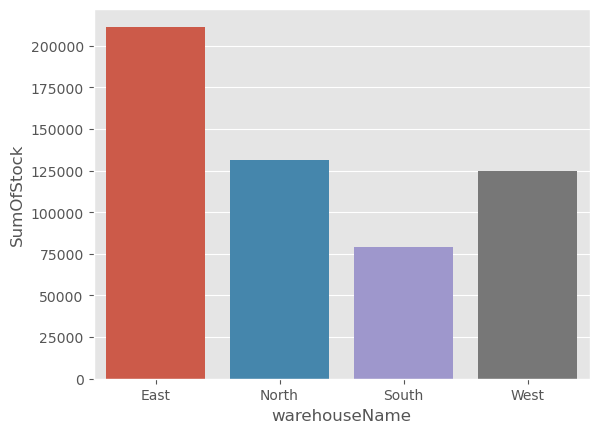

[None 'East' 'North' 'South' 'West'] 98801.0


<Axes: xlabel='warehouseName', ylabel='TotalQuantityOrdered'>

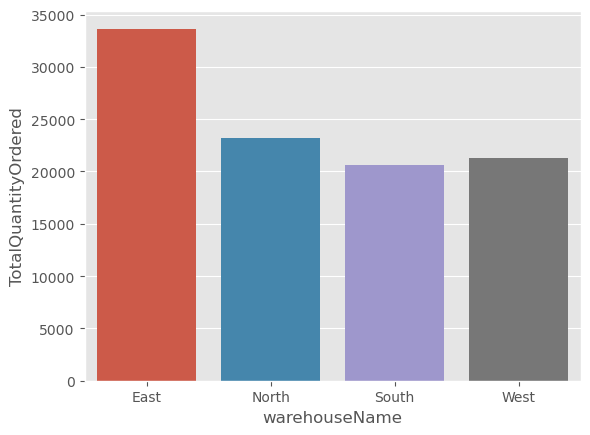

In [47]:
queryOne = "WITH All_Products as (SELECT productName, sum(quantityInStock) AS TotalStock FROM products GROUP BY productName),"          
queryTwo = "others as (select customerNumber, customerName, productCode, productName, productLine, quantityOrdered, quantityInStock, buyPrice, MSRP, warehouseName, orderNumber, orderDate, requiredDate, shippedDate, status, comments, contactLastName, contactFirstName, addressLine1, city, state, postalCode, country from customers JOIN orders using(customerNumber) join orderdetails using(orderNumber) join products using(productCode) join warehouses using(warehouseCode) where status IN ('shipped', 'Resolved'))"
queryThree = "SELECT distinct warehouseName, sum(distinct QuantityInStock) as SumOfStock, sum(quantityOrdered) as TotalQuantityOrdered FROM All_Products left join others using(ProductName) Group by warehouseName ORDER BY warehouseName"

df =  pd.read_sql_query(queryOne + queryTwo + queryThree, mydb)

SumOfInventory = df['SumOfStock'].sum()
warehouse = df['warehouseName'].unique()
Total_Amount_Ordered = df['TotalQuantityOrdered'].sum()

#print
print(warehouse, SumOfInventory)

#plot
sns.barplot(data=df, x='warehouseName', y='SumOfStock')
plt.show()
plt.clf()
#the second chart
print(warehouse, Total_Amount_Ordered)
sns.barplot(data=df, x='warehouseName', y='TotalQuantityOrdered')

From the chart above we can see the quantity of stock in relation to the quantity of products ordered. It is clear that Mint Classics is storing too much inventory as already demonstrated with the inventory turnover ratio.

Hence judging from the number of orders and sales, it is advisable that for the next 3 or 4 years mint classic should pause the restock of its warehouses because of the need to first clear out or reduce its overstocked inventories. Also it is very clear that the ‘east’ warehouse has the lowest inventory turnover.


II. We see that there’s normally a spike in orders notably in the month of November

Secondly, based on trends in the data-set it is seen that the highest quantity of products ordered occurs consistently in November, thus it is advisable for mint classic to maintain a proportional inventory based on their customer orders. 

This means that after the overstocked inventory has been cleared out or reduced to the necessary level, the company should use this monthly orders insight to always keep warehouses minimally stocked during periods of moderate orders but massively gather inventory when approaching the month of November.


**III. Cancelled, disputed and On hold orders across the warehouses** <br>
Generally we see from the chart below that the number of orders within this category is almost similar among the warehouses ; ranging from 1446 orders in the north warehouse as the highest to 1069 orders as the least number in the south.


In [9]:
queryOne = "WITH All_Products as (SELECT productName, sum(quantityInStock) AS TotalStock FROM products GROUP BY productName ),"
queryTwo = "others as (select customerNumber, customerName, productCode, productName, productLine, quantityOrdered, quantityInStock, warehouseCode, warehouseName, orderNumber, orderDate, requiredDate, shippedDate, status, comments, contactLastName, contactFirstName, addressLine1, city, state, postalCode, country from customers JOIN orders using(customerNumber) join orderdetails using(orderNumber) join products using(productCode) join warehouses using(warehouseCode) where status IN ('cancelled', 'Disputed', 'On Hold') )"
queryThree = 'SELECT distinct warehouseName, sum(quantityOrdered) as QuantityOf_Products_AlreadyShipped FROM All_Products left join others using(ProductName) Group by warehouseName with rollup ORDER BY warehouseName'

df =  pd.read_sql_query(queryOne + queryTwo + queryThree, mydb)
df

C:\Users\Princess\AppData\Local\Temp\ipykernel_5956\3436031071.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df =  pd.read_sql_query(queryOne + queryTwo + queryThree, mydb)


,warehouseName,QuantityOf_Products_AlreadyShipped
0,None,NaN
1,None,5225.0
2,East,1375.0
3,North,1446.0
4,South,1335.0
5,West,1069.0


C:\Users\Princess\AppData\Local\Temp\ipykernel_9844\2417477977.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df =  pd.read_sql_query(queryOne + queryTwo + queryThree, mydb)


<Axes: xlabel='warehouseName', ylabel='TotalQuantityOrdered'>

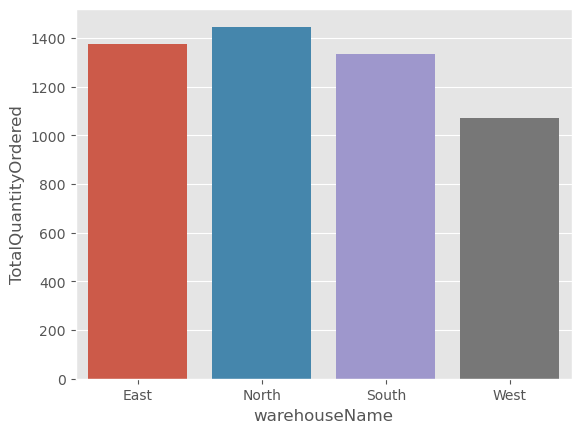

In [52]:
queryOne = "WITH All_Products as (SELECT productName, sum(quantityInStock) AS TotalStock FROM products GROUP BY productName),"          
queryTwo = "others as (select customerNumber, customerName, productCode, productName, productLine, quantityOrdered, quantityInStock, buyPrice, MSRP, warehouseName, orderNumber, orderDate, requiredDate, shippedDate, status, comments, contactLastName, contactFirstName, addressLine1, city, state, postalCode, country from customers JOIN orders using(customerNumber) join orderdetails using(orderNumber) join products using(productCode) join warehouses using(warehouseCode) where status IN ('cancelled', 'Disputed', 'On hold'))"
queryThree = "SELECT distinct warehouseName, sum(distinct QuantityInStock) as SumOfStock, sum(quantityOrdered) as TotalQuantityOrdered FROM All_Products left join others using(ProductName) Group by warehouseName ORDER BY warehouseName"

df =  pd.read_sql_query(queryOne + queryTwo + queryThree, mydb)
sns.barplot(data=df, x='warehouseName', y='TotalQuantityOrdered')

Hence considering this information, it also reinforces the case of reducing inventory across the warehouses especially for the east warehouse because it is already massively overstocked and this still keeps adding to the inventory there. 

<!-- remember to edit this analysis to match correct data insights -->
Edit... Also we noticed that in 2004 only the east warehouse had orders ‘cancelled’ ,  ‘disputed’ or put ‘on hold’ as seen from the query below, thus this is a positive indication for the other warehouses regarding their efficiency in completing orders while still highlighting the problems faced by the east warehouse.



IV. From the table above, it is seen that from 2003 to the 6 months(Jan - July) data for 2005 there has been a yearly increase in the total level of sales (based on orders) overall. Hence revenue wise it is good for the company.

# Conclusion
From my analysis, I didn’t get a conclusive analysis on the particular warehouse to be eliminated though but there are possible candidates including north and south warehouses. While the East warehouse though it has the lowest inventory turnover ratio, it would be very difficult to shut it down. 
